In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay


# --- Limpieza de datos según lo indicado ---
df = pd.read_csv(r'C:\Users\ppmel\OneDrive\Escritorio\ITESO 6to Semestre\Lab. Aprendizaje Estadistico\Dataset\titanic.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df)
del df['Sex_female']
df['Age'] = df['Age'].fillna(df.Age.mean())

# Variables predictoras y variable objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']

# --- División en conjunto de entrenamiento y test (80%-20%) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [20]:
# Crea un gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)

model.fit(X_train, y_train)

# Obtener las probabilidades predichas para la clase positiva
predicciones = model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_true=y_test, y_score=predicciones)
print(f"AUC-ROC: {roc_auc}")

AUC-ROC: 0.7806324110671937


In [21]:
## Cross validation 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline= Pipeline([
    ('gbt', GradientBoostingRegressor(n_estimators=300))
])

params= {
    'gbt__max_depth': [2,3,4,5],
    'gbt__learning_rate': [0.1, 0.5, 0.01]
}

grid_gbt= GridSearchCV(estimator=pipeline, param_grid=params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [22]:
# Mejor estimador 
grid_gbt.best_params_

{'gbt__learning_rate': 0.1, 'gbt__max_depth': 2}

In [25]:
# AUC
best_model= grid_gbt.best_estimator_.named_steps['gbt']

predicciones= best_model.predict(X_test)

roc_auc= roc_auc_score(y_true=y_test, y_score=predicciones)
roc_auc

np.float64(0.8090909090909092)

In [ ]:
## Calibracion

In [ ]:
# Entendiendo el modelo 
importancias = pd.DataFrame({
    'features': X_train.keys(),
    'importance': best_model.feature_importances_
})
importancias

,features,importance
0,Pclass,0.139143
1,Age,0.153962
2,SibSp,0.026923
3,Parch,0.009368
4,Fare,0.178536
5,Sex_male,0.474084
6,Embarked_C,0.000018
7,Embarked_Q,0.000684
8,Embarked_S,0.017280


Pclass


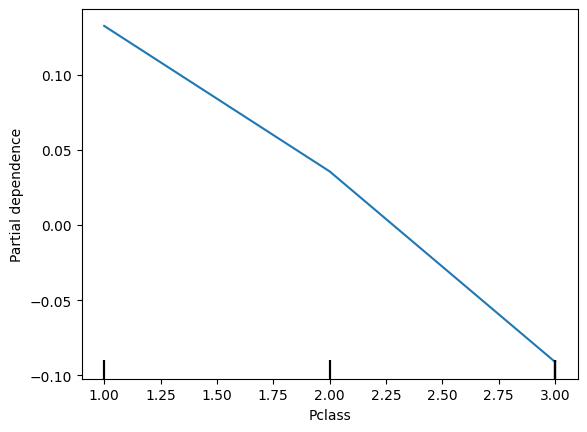

Age


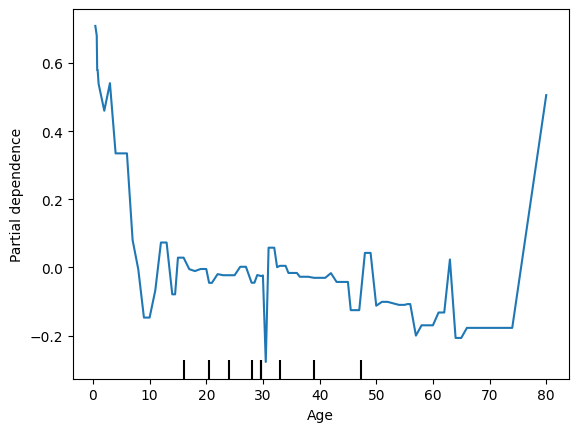

SibSp


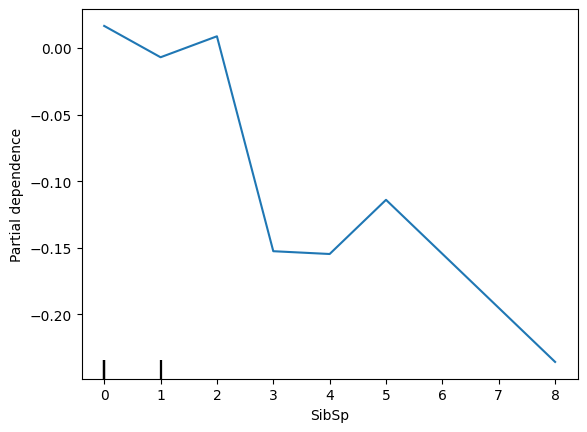

Parch


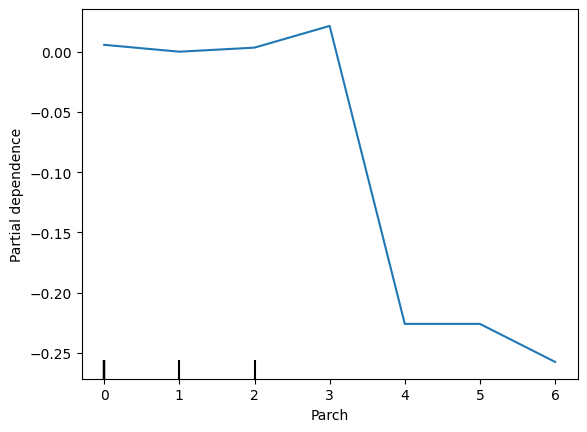

Fare


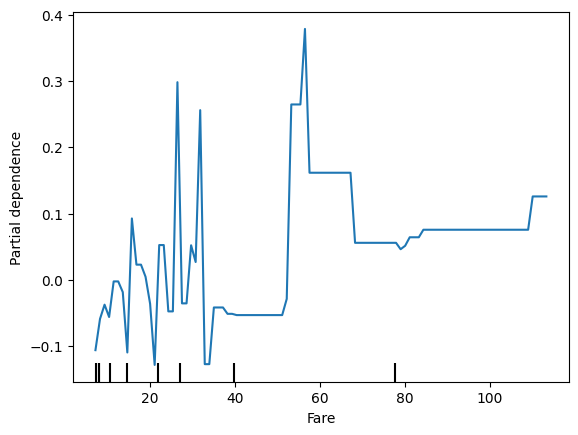

Sex_male


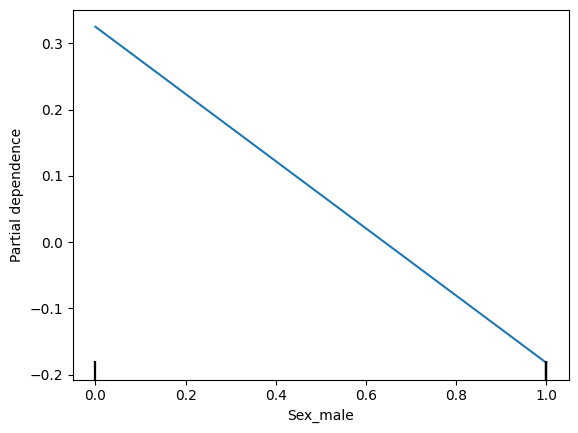

Embarked_C


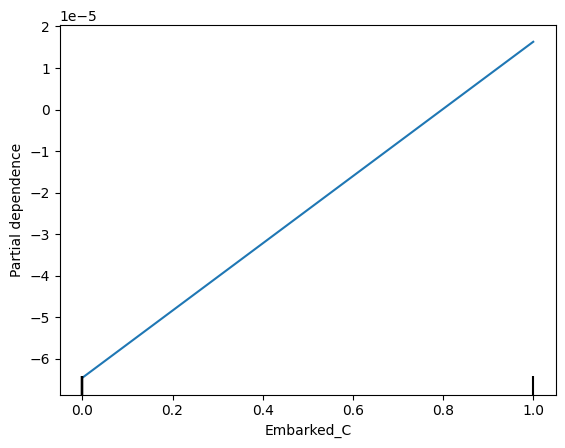

Embarked_Q


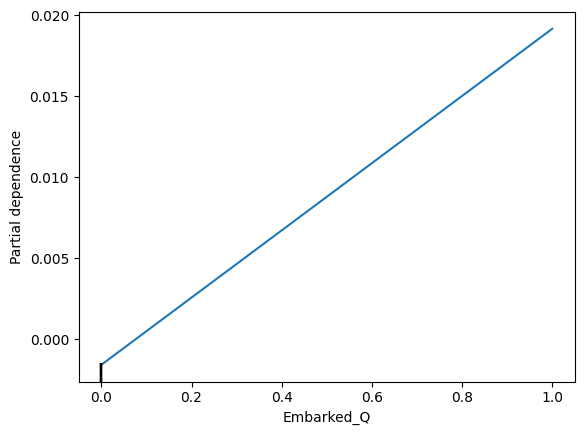

Embarked_S


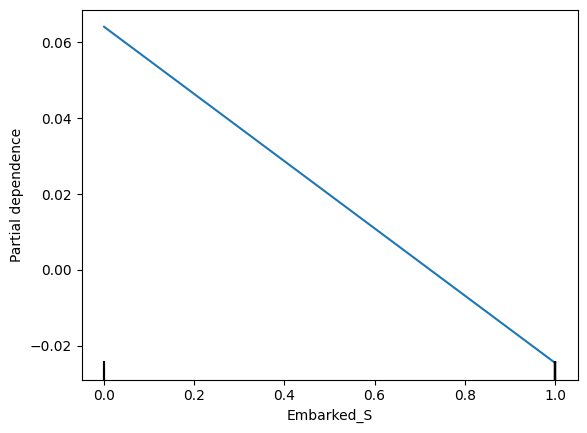

In [ ]:
# Codigo for para partial dependence plot 
for i in range(len(X_train.keys())):
    print(X_train.keys()[i])
    PartialDependenceDisplay.from_estimator(
        best_model,
        X_train,
        [i],
        feature_names=X_train.keys()
    )
    plt.show()

### PREGUNTA EXAMEN 
¿Qué es partial dependence?
